In [7]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pylot (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pylot

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import fetch_openml

In [13]:
boston = fetch_openml(data_id=531, as_frame=True)
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [15]:
X_pd = boston.data
y_pd = boston.target
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 80)
boston_housing = pd.concat([X_pd, y_pd], axis=1)
with pd.option_context('expand_frame_repr', False):
    print(boston_housing.head())
X = X_pd.to_numpy()
y = y_pd.to_numpy()

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7  396.90   5.33  36.2


In [18]:
np.random.seed(4)
n = X.shape[0]
tsa = np.random.choice(n, size=int(0.8 * n), replace = False)
X_train, X_test = X[tsa], X[~np.isin(np.arange(n), tsa)]
y_train, y_test = y[tsa], y[~np.isin(np.arange(n), tsa)]

[np.float64(0.00689612639682924), np.float64(10.0), np.float64(0.020688379190487723)]
{'Risk Lasso': np.float64(25.33582816911567), 'Risk Ridge': np.float64(25.459376993199687), 'Risk EN': np.float64(25.409627304044022)}
Log of lambda min values: [-4.97679542  2.30258509 -3.87818313]


/var/folders/5l/wh13tw8n24xclm8g7m18x8zr0000gn/T/ipykernel_25404/829355219.py:65: UserWarning: Glyph 65535 (\uffff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/luz/Documents/Desarrollo/GitHub/machine-learning/path/to/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65535 (\uffff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


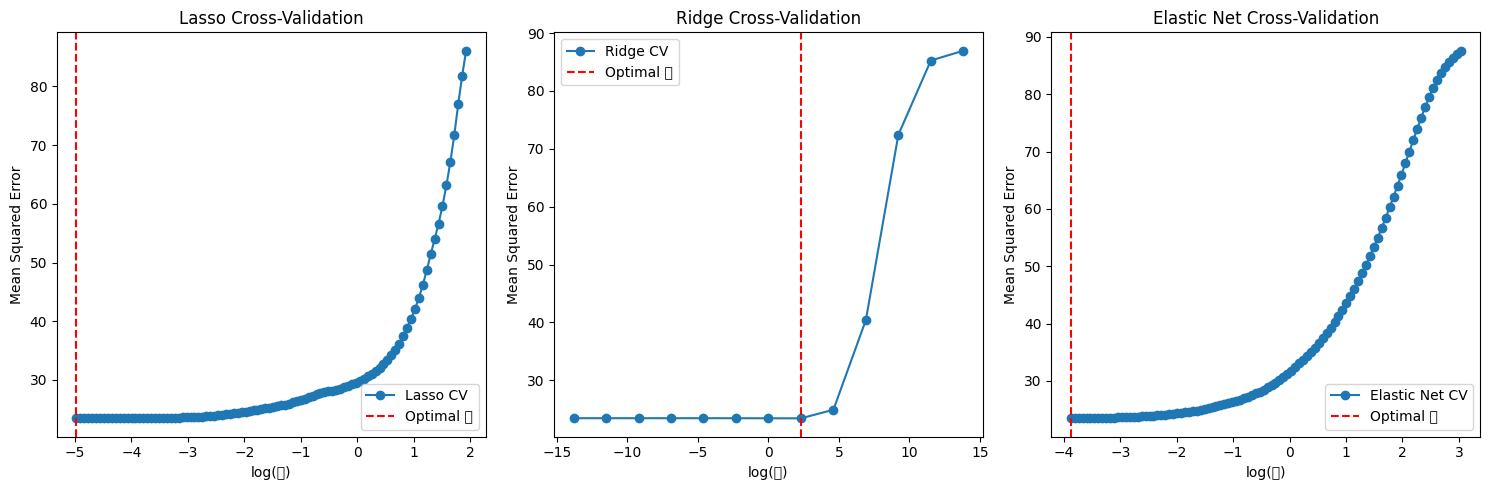

In [21]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lasso, Ridge, ElasticNet with cross-validation
cv_lasso = LassoCV(cv=5).fit(X_train, y_train)
cv_ridge = RidgeCV(alphas=np.logspace(-6, 6, 13)).fit(X_train, y_train)
cv_en = ElasticNetCV(cv=5, l1_ratio=1/3).fit(X_train, y_train)
lambda_min = [cv_lasso.alpha_, cv_ridge.alpha_, cv_en.alpha_]
print(lambda_min)

# Predictions
pred_lasso = cv_lasso.predict(X_test)
pred_ridge = cv_ridge.predict(X_test)
pred_en = cv_en.predict(X_test)

# Compute empirical risk (Mean Squared Error)
empR_lasso = np.mean((y_test - pred_lasso) ** 2)
empR_ridge = np.mean((y_test - pred_ridge) ** 2)
empR_en = np.mean((y_test - pred_en) ** 2)

# Output results
results = {"Risk Lasso": empR_lasso, "Risk Ridge": empR_ridge, "Risk EN":empR_en}
print(results)

# Log of lambda values
lambda_min_log = np.log(lambda_min)
print("Log of lambda min values:", lambda_min_log)

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Lasso CV plot
axes[0].plot(np.log(cv_lasso.alphas_), cv_lasso.mse_path_.mean(axis=1),marker='o', label="Lasso CV")
axes[0].axvline(np.log(cv_lasso.alpha_), color='red', linestyle='dashed',label="Optimal ￿")
axes[0].set_xlabel("log(￿)")
axes[0].set_ylabel("Mean Squared Error")
axes[0].set_title("Lasso Cross-Validation")
axes[0].legend()

# Ridge CV plot (manual error computation)
ridge_errors = []
alphas = np.logspace(-6, 6, 13)

for alpha in alphas:
    ridge = RidgeCV(alphas=[alpha], store_cv_results=True).fit(X_train, y_train)
    ridge_errors.append(np.mean(ridge.cv_results_)) # Mean CV error for each alpha

axes[1].plot(np.log(alphas), ridge_errors, marker='o', label="Ridge CV")
axes[1].axvline(np.log(cv_ridge.alpha_), color='red', linestyle='dashed',label="Optimal ￿")
axes[1].set_xlabel("log(￿)")
axes[1].set_ylabel("Mean Squared Error")
axes[1].set_title("Ridge Cross-Validation")
axes[1].legend()

# Elastic Net CV plot
axes[2].plot(np.log(cv_en.alphas_), cv_en.mse_path_.mean(axis=1), marker='o',label="Elastic Net CV")
axes[2].axvline(np.log(cv_en.alpha_), color='red', linestyle='dashed',label="Optimal ￿")
axes[2].set_xlabel("log(￿)")
axes[2].set_ylabel("Mean Squared Error")
axes[2].set_title("Elastic Net Cross-Validation")
axes[2].legend()

plt.tight_layout()
plt.show()

In [22]:
# Output results
results_sqrt = {"Risk Lasso": np.sqrt(empR_lasso), "Risk Ridge": np.sqrt(empR_ridge), "Risk EN": np.sqrt(empR_en)}
print(results_sqrt)

{'Risk Lasso': np.float64(5.033470787549647), 'Risk Ridge': np.float64(5.045728588935367), 'Risk EN': np.float64(5.040796296622591)}
